# Case Study 2 No.4

In [15]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv("D2Proto2.csv", na_values = '?', low_memory=False)

In [17]:
df.dropna(subset=['race','age'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35326 entries, 0 to 36182
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   race               35326 non-null  object
 1   age                35326 non-null  object
 2   time_in_hospital   35326 non-null  int64 
 3   medical_specialty  35326 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [19]:
df['age'].unique()

array(['[60-70)', '[80-90)', '[70-80)', '[40-50)', '[50-60)', '[90-100)',
       '[30-40)', '[20-30)', '[10-20)', '[0-10)'], dtype=object)

In [20]:
df['medical_specialty'].unique()

array(['InternalMedicine', 'Invalid', 'Cardiology', 'Emergency/Trauma',
       'Neurology', 'Surgery-General', 'Family/GeneralPractice',
       'Surgery-Cardiovascular/Thoracic', 'Surgery-Vascular', 'Oncology',
       'Osteopath', 'Surgery-Neuro', 'Radiologist', 'Nephrology',
       'Pulmonology', 'Orthopedics-Reconstructive', 'Gastroenterology',
       'Surgery-Plastic', 'Surgery-Pediatric', 'Psychiatry',
       'Orthopedics', 'Urology', 'Surgery-Cardiovascular', 'Gynecology',
       'PhysicalMedicineandRehabilitation', 'ObstetricsandGynecology',
       'Hematology/Oncology', 'Podiatry', 'Otolaryngology', 'Surgeon',
       'Pediatrics', 'Psychology', 'Hematology', 'OutreachServices',
       'Endocrinology', 'Pathology', 'Obstetrics', 'Surgery-Thoracic',
       'Cardiology-Pediatric', 'Ophthalmology', 'Rheumatology',
       'Surgery-Maxillofacial', 'Hospitalist', 'InfectiousDiseases',
       'Perinatology', 'PhysicianNotFound', 'SurgicalSpecialty',
       'Neurophysiology', 'Anesthesio

In [21]:
# Define mappings for 'age' and 'medical_specialty'
age_map = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9
}

specialty_map = {
    'InternalMedicine': 1,
    'Invalid': 0,
    'Cardiology': 2,
    'Emergency/Trauma': 3,
    'Neurology': 4,
    'Surgery-General': 5,
    'Family/GeneralPractice': 6,
    'Surgery-Cardiovascular/Thoracic': 7,
    'Surgery-Vascular': 8,
    'Oncology': 9,
    'Osteopath': 10,
    'Surgery-Neuro': 11,
    'Radiologist': 12,
    'Nephrology': 13,
    'Pulmonology': 14,
    'Orthopedics-Reconstructive': 15,
    'Gastroenterology': 16,
    'Surgery-Plastic': 17,
    'Surgery-Pediatric': 18,
    'Psychiatry': 19,
    'Orthopedics': 20,
    'Urology': 21,
    'Surgery-Cardiovascular': 22,
    'Gynecology': 23,
    'PhysicalMedicineandRehabilitation': 24,
    'ObstetricsandGynecology': 25,
    'Hematology/Oncology': 26,
    'Podiatry': 27,
    'Otolaryngology': 28,
    'Surgeon': 29,
    'Pediatrics': 30,
    'Psychology': 31,
    'Hematology': 32,
    'OutreachServices': 33,
    'Endocrinology': 34,
    'Pathology': 35,
    'Obstetrics': 36,
    'Surgery-Thoracic': 37,
    'Cardiology-Pediatric': 38,
    'Ophthalmology': 39,
    'Rheumatology': 40,
    'Surgery-Maxillofacial': 41,
    'Hospitalist': 42,
    'InfectiousDiseases': 43,
    'Perinatology': 44,
    'PhysicianNotFound': 45,
    'SurgicalSpecialty': 46,
    'Neurophysiology': 47,
    'Anesthesiology': 48,
    'Radiology': 49,
    'Endocrinology-Metabolism': 50,
    'DCPTEAM': 51,
    'Resident': 52,    
}

# Map 'age' and 'medical_specialty' using the defined mappings
df['age'] = df['age'].map(age_map)
df['medical_specialty'] = df['medical_specialty'].map(specialty_map)

In [22]:
from sklearn.preprocessing import StandardScaler

# mapping
race_map = {'Caucasian':1, 'Asian':2, 'AfricanAmerican':3, 'Hispanic':4, 'Other':5,}
df['race'] = df['race'].map(race_map)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35326 entries, 0 to 36182
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   race               35326 non-null  int64
 1   age                35326 non-null  int64
 2   time_in_hospital   35326 non-null  int64
 3   medical_specialty  35326 non-null  int64
dtypes: int64(4)
memory usage: 1.3 MB


In [24]:
print(df.head(5))

   race  age  time_in_hospital  medical_specialty
0     1    6                 4                  1
1     1    8                 8                  0
2     1    8                 2                  2
3     1    6                 2                  0
4     1    6                 7                  0


In [25]:
# Clustering after Normalization
# convert df to matrix
X = df.to_numpy()
# scaling

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
print(df.head(5))

   race  age  time_in_hospital  medical_specialty
0     1    6                 4                  1
1     1    8                 8                  0
2     1    8                 2                  2
3     1    6                 2                  0
4     1    6                 7                  0


In [28]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [30]:
# list to save the clusters and cost
clusters = []
cost_vals = []
rs = 42

# this whole process should take a while
for k in range(2, 10, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X, categorical=[0, 1, 3])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

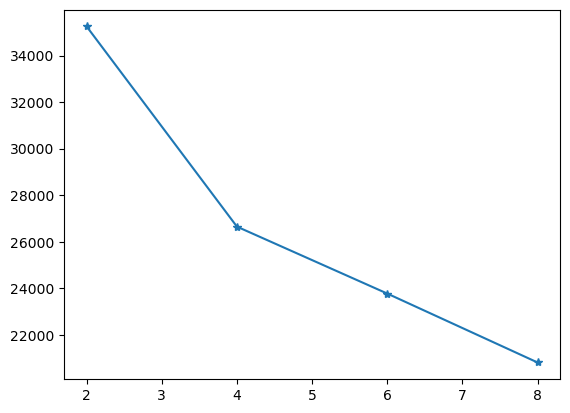

In [31]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# plot the cost vs K values
plt.plot(range(2,10,2), cost_vals, marker='*')
plt.show()

In [32]:
X_num = [[row[0], row[2]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[1]] for row in X] # variables of X with categorical datatype

In [33]:
model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4

In [34]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

Silscore for numeric variables: 0.3894322566494082
Silscore for categorical variables: -0.03769810781876909
The avg silhouette score for k=4: 0.17586707441531957


In [35]:
model = clusters[1]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=4: " + str(silScore))

model = clusters[2]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming')
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=6: " + str(silScore))

model = clusters[3]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=8: " + str(silScore))

The avg Silhouette score for k=4: 0.17586707441531957
The avg Silhouette score for k=6: 0.1717401484411391
The avg Silhouette score for k=8: 0.1970330529260022


Cluster membership
1    19102
2     6784
3     6454
0     2986
Name: Cluster_ID, dtype: int64


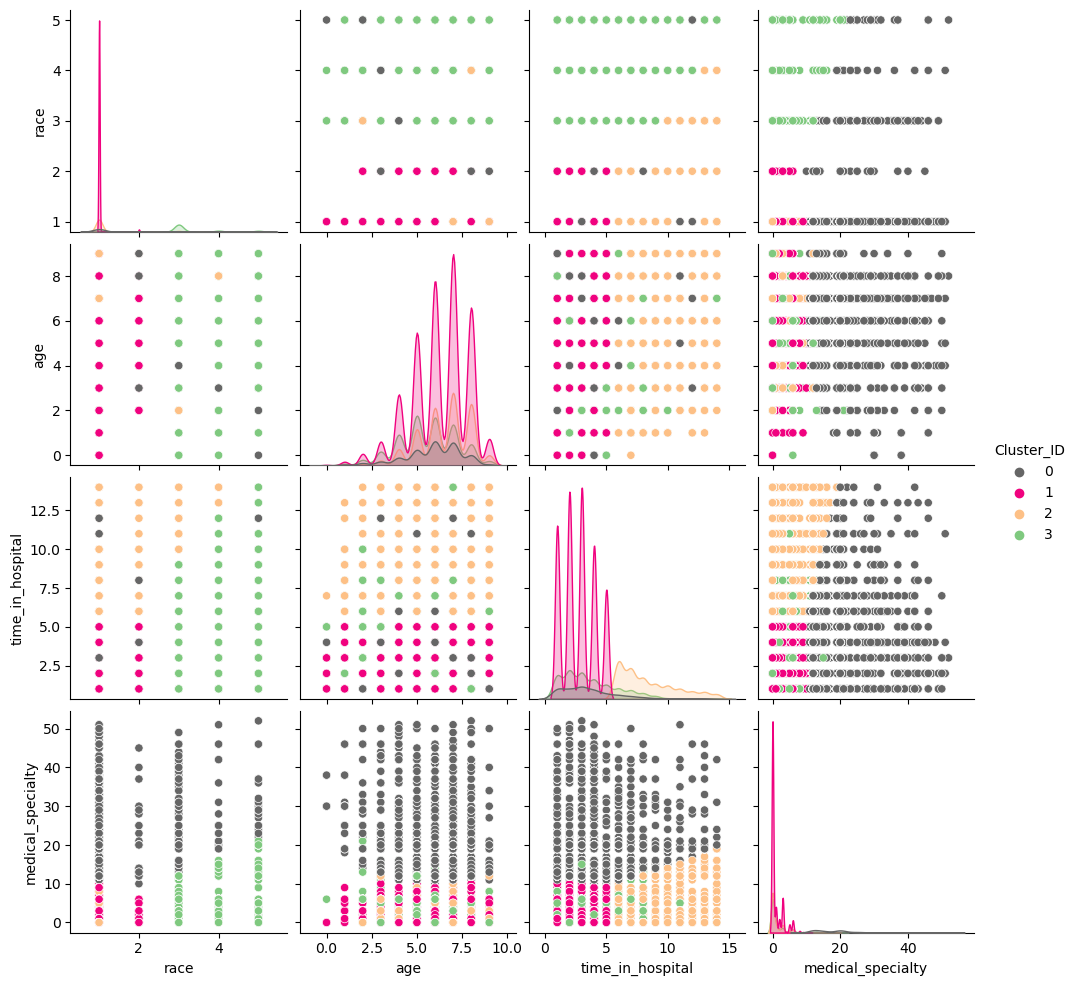

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
model = clusters[1]
y=model.fit_predict(X, categorical=[1]) 
df['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df, hue='Cluster_ID', diag_kind='kde', palette = 'Accent_r')
plt.show()

Distribution for cluster 0


C:\Users\n11491205\AppData\Local\Temp\ipykernel_15096\630762853.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\n11491205\AppData\Local\Temp\ipykernel_15096\630762853.py:18: Use

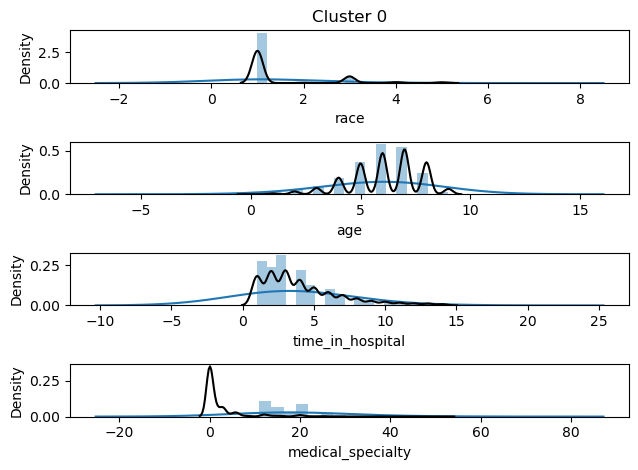

Distribution for cluster 1


C:\Users\n11491205\AppData\Local\Temp\ipykernel_15096\630762853.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\n11491205\AppData\Local\Temp\ipykernel_15096\630762853.py:18: Use

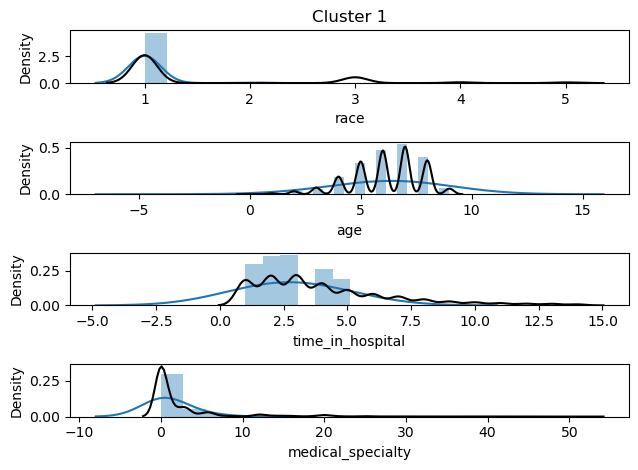

Distribution for cluster 2


C:\Users\n11491205\AppData\Local\Temp\ipykernel_15096\630762853.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\n11491205\AppData\Local\Temp\ipykernel_15096\630762853.py:18: Use

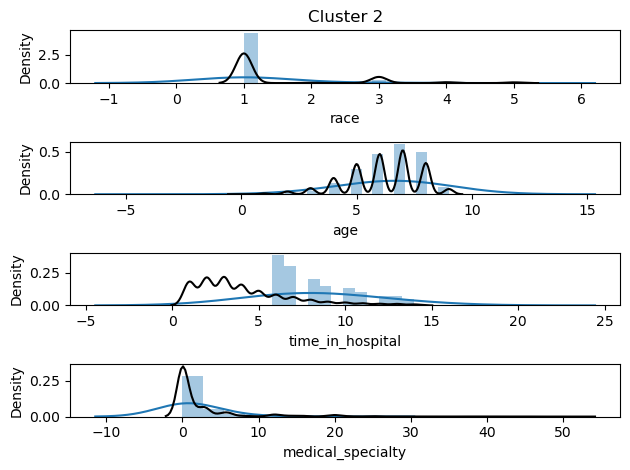

Distribution for cluster 3


C:\Users\n11491205\AppData\Local\Temp\ipykernel_15096\630762853.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\n11491205\AppData\Local\Temp\ipykernel_15096\630762853.py:18: Use

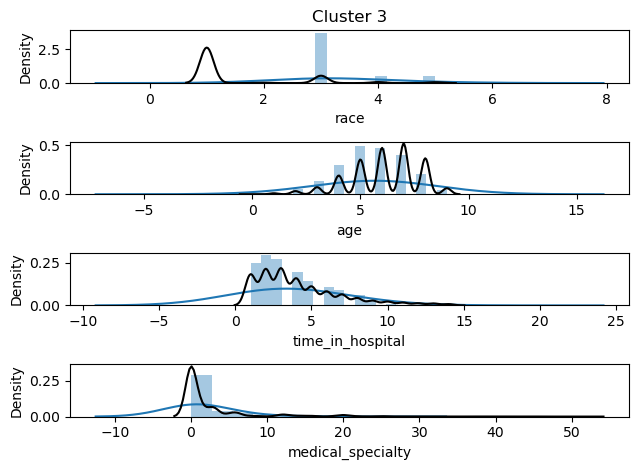

In [37]:
import pandas as pd
import numpy as np
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['race', 'age', 'time_in_hospital', 'medical_specialty']
n_bins = 20


clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    fig, ax = plt.subplots(nrows=4)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        bins = np.linspace(min(df[col]), max(df[col]), 20)
        sns.distplot(df[df['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
        sns.distplot(df[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()